**Project Objective and Requirements:**

•	Task: Perform Exploratory Data Analysis (EDA) on the Titanic dataset.

•	Main Focus: Examine missing values, distribution of data, and feature relationships using basic visualizations such as histograms and correlation heatmaps.

•	Skills: Data wrangling, cleaning, visualization (Seaborn, Matplotlib), basic statistics, and communication of findings.


In [2]:
#Importing all the required Libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
#Check For the Datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
#Load Titanic Dataset:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Observation:**

-Above Dataset contains 891 rows and 15 columns, indexed from 0 to 890, indicating a moderately sized tabular dataset suitable for EDA and modeling tasks

In [5]:
#checking Basic Information of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Observation:**

  -This DataFrame contains 891 rows and 15 columns, with a mix of numeric, categorical, and boolean data
  
  -several columns like 'age', 'deck', and 'embarked' have missing values that should be considered for analysis





In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation:**

-The dataset contains 891 samples. About 38% of the passengers survived, indicating lower survival odds. 

-The average passenger class is approximately 2.31, with most passengers traveling in third class (as median pclass is 3)

-The typical age is around 29.7 years, though the ages range broadly from 0.42 to 80.

-Family connections aboard vary, with most passengers having no siblings/spouses or parents/children with them (median of 0 for both sibsp and parch)

-The fare paid ranges widely, with an average around 32.2, but the data is highly skewed as some fares are significantly higher than the median of 14.45. 

-Overall, the dataset exhibits substantial variability in demographic and ticketing characteristics, which is important for modeling and further analysis.

In [12]:
#To check overall Structure and format of a given dataset we display first and last few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Observation:**

  
-Age column contains 177 Null Values.

-Deck contains 688 Null Values.

In [15]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [16]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
df['age'].isnull().sum()

np.int64(177)

In [19]:
null_per_age=df['age'].isnull().sum()/len(df)
null_per_age

np.float64(0.19865319865319866)

In [20]:
print ("percentage  of null value in age:",null_per_age*100)

percentage  of null value in age: 19.865319865319865


In [21]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

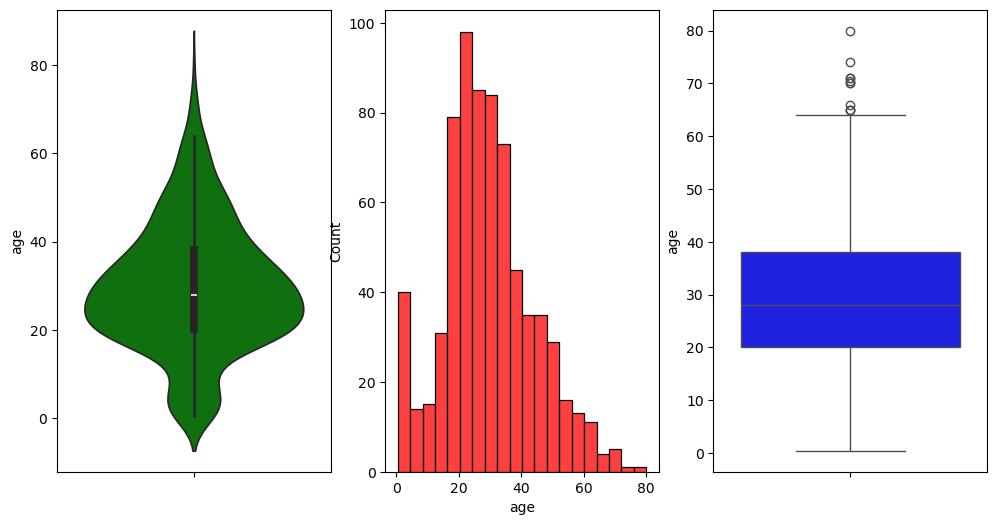

In [22]:
fig,axes=plt.subplots(1,3,figsize=(12,6))
sns.violinplot(df['age'],ax=axes[0],color='g')
sns.histplot(df['age'],ax=axes[1],color='r')
sns.boxplot(df['age'],ax=axes[2],color='b')
plt.show()

In [23]:
df['age'].skew()


np.float64(0.38910778230082704)

In [24]:
df['age'].kurt()


np.float64(0.17827415364210353)

In [25]:
df['age'].median()


28.0

In [26]:
df['age'].mean()


np.float64(29.69911764705882)

In [28]:
df['age'] = df['age'].fillna(df['age'].median())
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [29]:
df['age'].isnull().sum()

np.int64(0)

In [30]:
null_per_deck=df['deck'].isnull().sum()/len(df)
null_per_deck

np.float64(0.7721661054994389)

In [31]:
df.drop(columns=['deck'],inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [32]:
df['No_of_person']=df['sibsp']+df['parch']
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,No_of_person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [33]:
df.drop(columns=['sibsp','parch'])

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,No_of_person
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,0
887,1,1,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,28.0,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [34]:
len(df['survived'])

891

In [35]:
df['survived'].value_counts()/891*100

survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [36]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [37]:
survived=df['survived'].value_counts()[1]
survived_percent=survived/len(df)
print("the survived Percentage is :",survived_percent*100)

the survived Percentage is : 38.38383838383838


In [38]:
round(survived_percent*100,2)

np.float64(38.38)

In [39]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [40]:
df2=pd.crosstab(df['class'],df['survived'])
df2

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [41]:
df2.rename(columns={0:'Died',1:'survived'},inplace=True)
df2


survived,Died,survived
class,,
First,80,136
Second,97,87
Third,372,119


In [42]:
df2['Sur_Perc']=df2['survived']/(df2['Died']+df2['survived'])
df2

survived,Died,survived,Sur_Perc
class,,,
First,80,136,0.629630
Second,97,87,0.472826
Third,372,119,0.242363


In [43]:
df2['Sur_Perc']=round((df2['Sur_Perc']*100),2)
df2

survived,Died,survived,Sur_Perc
class,,,
First,80,136,62.96
Second,97,87,47.28
Third,372,119,24.24


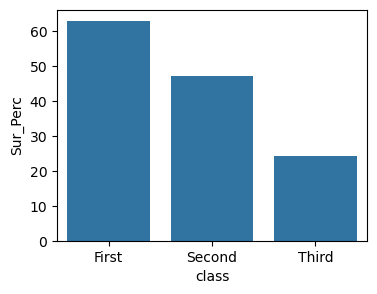

In [44]:
plt.figure(figsize=(4,3))
sns.barplot(x=df2.index,y=df2['Sur_Perc'])
plt.show()

In [45]:
df['No_of_person'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [46]:
 df['No_of_person'].sum()

np.int64(806)

In [47]:
df.groupby('survived')['fare'].mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [49]:
# Descriptive statistics summary for numeric columns (age, fare, etc.)
desc_stats = df[['age', 'fare']].describe()
print(desc_stats)


              age        fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


In [50]:
# Additional range calculations
range_stats = df[['age', 'fare']].agg(['min', 'max'])
range_stats.loc['range'] = range_stats.loc['max'] - range_stats.loc['min']
print(range_stats.loc['range'])

age      79.5800
fare    512.3292
Name: range, dtype: float64


Text(0, 0.5, 'Frequency')

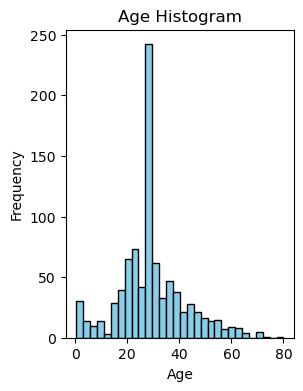

In [51]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age Boxplot')

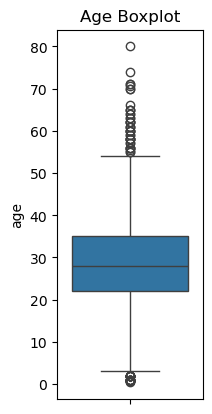

In [52]:
plt.subplot(1, 3, 2)
sns.boxplot(y=df['age'])
plt.title('Age Boxplot')

Text(0.5, 1.0, 'Age Violin Plot')

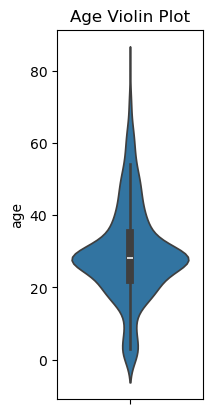

In [53]:
plt.subplot(1, 3, 3)
sns.violinplot(y=df['age'])
plt.title('Age Violin Plot')

In [56]:
#overall survival percentage
overall_survival = df['survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival:.2f}%")

Overall Survival Rate: 38.38%


In [60]:
# Survival rate by sex
class_survival = df.groupby('pclass')['survived'].mean() * 100
print("Survival Rate by Class:")
print(class_survival)

Survival Rate by Class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


In [61]:
# Create a 'family_size' column as sum of siblings/spouses and parents/children + 1 (self)
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [62]:
# Survival rate by alone status (assumes 'alone' column exists, else create it)
if 'alone' not in df.columns:
    df['alone'] = df['family_size'] == 1
alone_survival = df.groupby('alone')['survived'].mean() * 100
print("\nSurvival Rate by Alone Status:")
print(alone_survival)


Survival Rate by Alone Status:
alone
False    50.564972
True     30.353818
Name: survived, dtype: float64


In [63]:
# Visualize survival by age with histogram and survival by fare using scatterplot
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 0, 'Age')

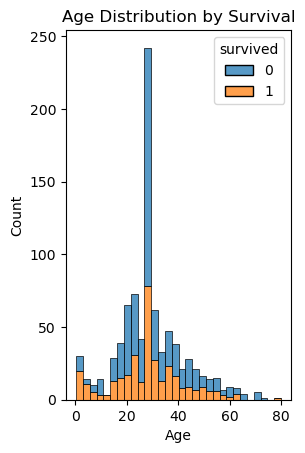

In [64]:
# Age distribution by survival
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')

Text(0, 0.5, 'Survived (0=No,1=Yes)')

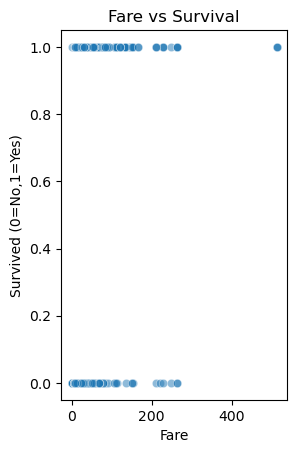

In [65]:
# Fare vs Survival scatter
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='fare', y='survived', alpha=0.5)
plt.title('Fare vs Survival')
plt.xlabel('Fare')
plt.ylabel('Survived (0=No,1=Yes)')

In [66]:
# Survival rate by family size groups
family_size_survival = df.groupby('family_size')['survived'].mean() * 100
print("\nSurvival Rate by Family Size:")
print(family_size_survival)


Survival Rate by Family Size:
family_size
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: survived, dtype: float64


In [74]:
print("Passenger Class Counts:")
print(df['pclass'].value_counts())




Passenger Class Counts:
pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [75]:
print("\nSex Counts:")
print(df['sex'].value_counts())


Sex Counts:
sex
male      577
female    314
Name: count, dtype: int64


In [69]:
print("\nEmbarkation Counts:")
print(df['embarked'].value_counts())


Embarkation Counts:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [71]:
# Cross-tabulation of survival rates by class and sex
survival_class_sex = pd.crosstab([df['pclass'], df['sex']], df['survived'], normalize='index') * 100
print("\nSurvival Rates by Class and Sex (%):")
print(survival_class_sex)


Survival Rates by Class and Sex (%):
survived               0          1
pclass sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669


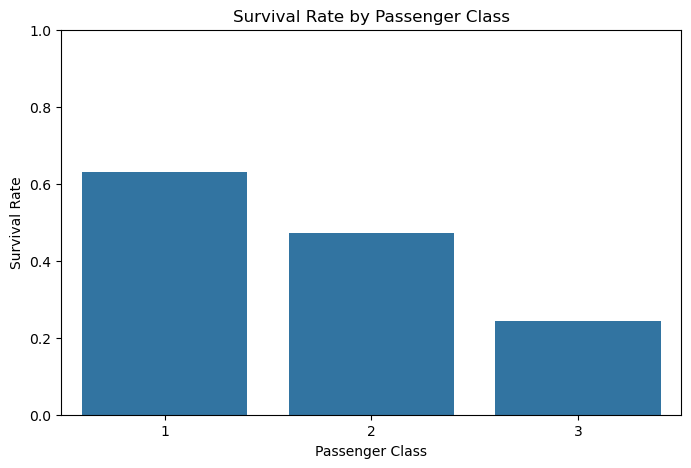

In [73]:

# Visualize survival by passenger class using bar plots
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

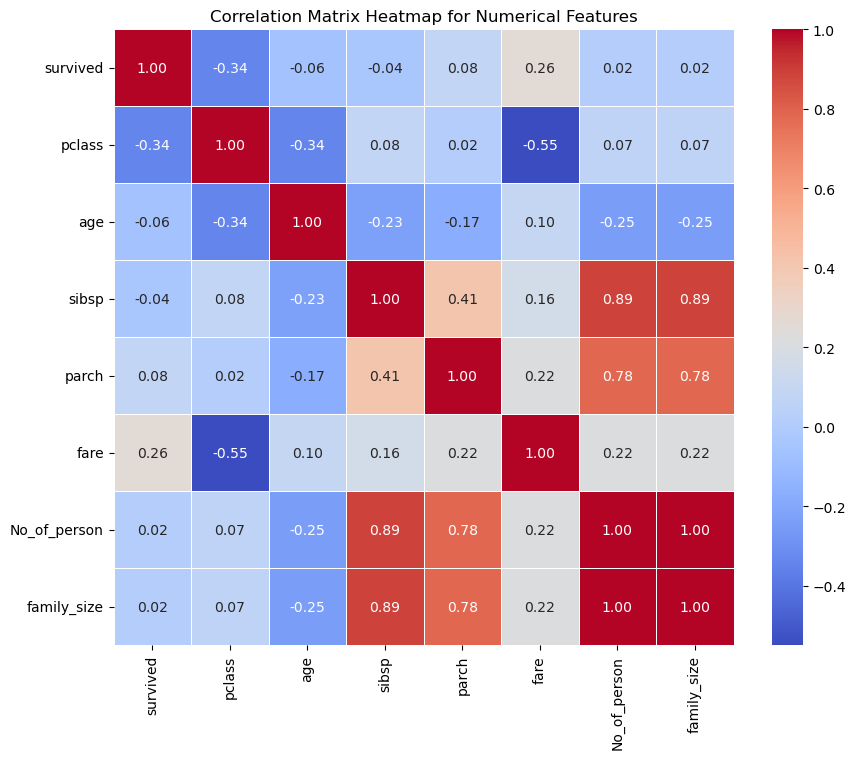

In [79]:
# Select numerical columns for correlation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Numerical Features')
plt.show()

In [93]:
# Overall survival rate
overall_survival = df['survived'].mean() * 100
overall_survival 

np.float64(38.38383838383838)

In [94]:
# Family size and alone status
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['alone'] = df['family_size'] == 1
family_survival = df.groupby('family_size')['survived'].mean() * 100
alone_survival = df.groupby('alone')['survived'].mean() * 100
family_survival,alone_survival

(family_size
 1     30.353818
 2     55.279503
 3     57.843137
 4     72.413793
 5     20.000000
 6     13.636364
 7     33.333333
 8      0.000000
 11     0.000000
 Name: survived, dtype: float64,
 alone
 False    50.564972
 True     30.353818
 Name: survived, dtype: float64)

In [95]:
# Survival rate by class and sex
class_survival = df.groupby('pclass')['survived'].mean() * 100
sex_survival = df.groupby('sex')['survived'].mean() * 100
class_survival,sex_survival

(pclass
 1    62.962963
 2    47.282609
 3    24.236253
 Name: survived, dtype: float64,
 sex
 female    74.203822
 male      18.890815
 Name: survived, dtype: float64)

In [96]:
# Fare and survival correlation
fare_survival_corr = df[['fare', 'survived']].corr().iloc[0,1]
fare_survival_corr

np.float64(0.2573065223849626)

**Summary:**

-The Titanic dataset analysis shows that overall, about 38% of passengers survived the disaster. 

-Key factors strongly linked to survival were passenger class, sex, fare paid, family size, and whether a passenger was alone. 

-First-class passengers and females had much higher survival rates—over 60% of first-class passengers survived compared to less than 25% in third class. 

-Females were significantly more likely to survive than males, reflecting the “women and children first” rescue protocol.

-Fare positively correlated with survival, indicating that passengers paying higher fares (generally in higher classes) were more likely to survive.

-Family size influenced outcomes: very small or very large families had lower survival odds, while moderate family groups fared better. 

-The “alone” status also impacted survival, with those traveling alone generally less likely to survive than those with family.

-Limitations include missing data for some variables such as deck location, which restricts deeper insight into cabin-based survival differences. 
                            
                                
-Median imputation for missing ages introduces some uncertainty in age-related trends. Despite these limitations, 
the analysis provides strong evidence that social status and demographics decisively influenced survival during the Titanic tragedy.


                
-This structured and visualized exploratory analysis highlights key survival patterns that inform historical understanding and predictive modeling efforts for this iconic dataset.

